In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#sns.set(style = 'white', color_code=True)
#import warnings
#warnings.filterwarnings('ignore')
#sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape,test.shape
# test.plot(y='LoanAmount',x='Loan_Amount_Term',kind='scatter')

((614, 13), (367, 12))

In [3]:
train['source'] = 'train'
test['source'] = 'test'

In [4]:
data = pd.concat([train,test],ignore_index=False)
#data.info()
# data.head()

## HistoGrams

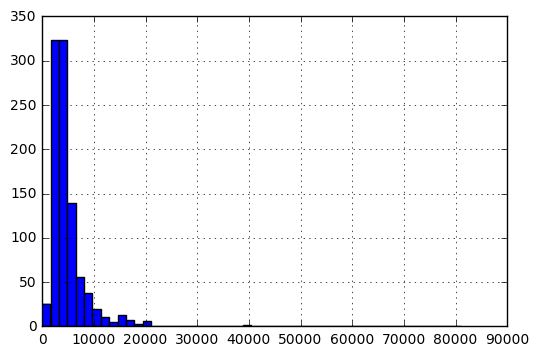

In [5]:
data['ApplicantIncome'].hist(bins=50)

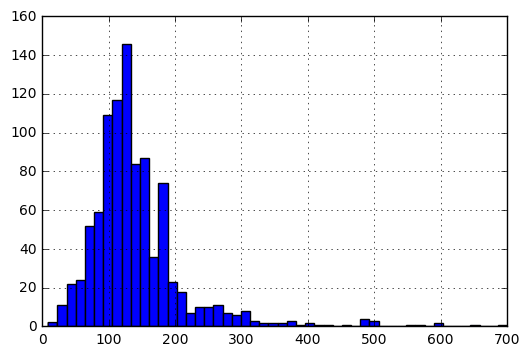

In [6]:
data['LoanAmount'].hist(bins=50)

## BoxPlots

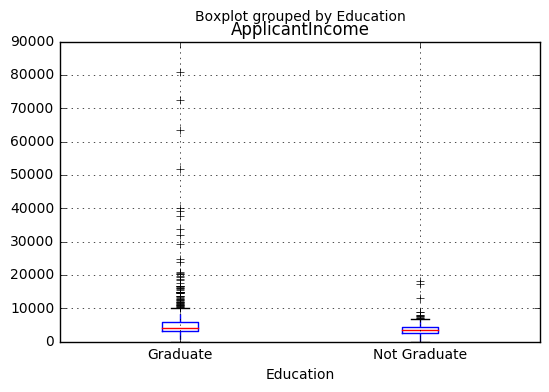

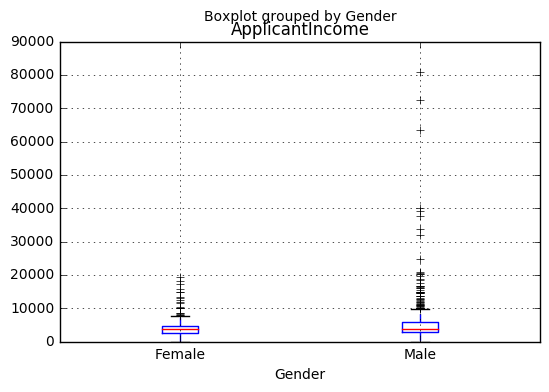

In [7]:
data.boxplot(column='ApplicantIncome',by='Education')
data.boxplot(column='ApplicantIncome',by='Gender')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x9a23828>],
 'caps': [<matplotlib.lines.Line2D at 0x9a2eb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x9a39a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x9a34ba8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x9a23ac8>,
  <matplotlib.lines.Line2D at 0x9a2e9b0>]}

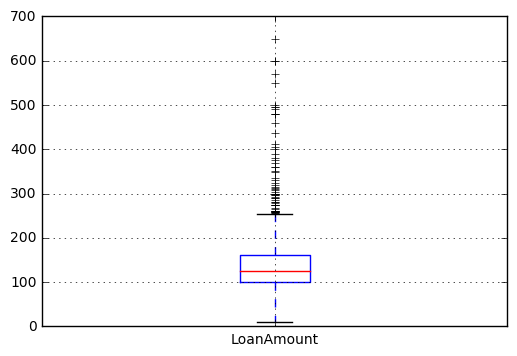

In [8]:
data.boxplot(column='LoanAmount')

In [9]:
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

## Pivot Table

In [10]:
data['Gender'].fillna('Male',inplace=True)

data['Married'].fillna('Yes',inplace=True)

data['Self_Employed'].fillna('No',inplace=True)

impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)

print(impute_grps)

                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.527778
               Yes            138.714286
       Yes     No             136.903846
               Yes            282.250000
Male   No      No             126.601036
               Yes            163.960000
       Yes     No             150.286598
               Yes            164.041096


## MultiIndexing(Filling missing Values in LoanAmount group by Gender,married and Self_Employed)

In [11]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#iterate only through rows with missing LoanAmount
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]

#Now check the #missing values again to confirm:
print(data.apply(num_missing, axis=0))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64


## Cross Tab

In [12]:
#pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)
pd.crosstab(data['Dependents'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [13]:
#Lets convert above CrossTab to Percentage
def percConvert(ser):
  return (ser/float(ser[-1]))*100


var = ['Married','Dependents','Gender']
for v in var:
    ct = pd.crosstab(data[v],data["Credit_History"],margins=True).apply(percConvert, axis=1)
    print(ct)

Credit_History        0.0        1.0    All
Married                                    
No              17.554859  82.445141  100.0
Yes             15.780446  84.219554  100.0
All             16.407982  83.592018  100.0
Credit_History        0.0        1.0    All
Dependents                                 
0               15.568862  84.431138  100.0
1               13.793103  86.206897  100.0
2               16.666667  83.333333  100.0
3+              24.096386  75.903614  100.0
All             16.268487  83.731513  100.0
Credit_History        0.0        1.0    All
Gender                                     
Female          18.181818  81.818182  100.0
Male            16.010855  83.989145  100.0
All             16.407982  83.592018  100.0


In [14]:
#To remove outliers in LoanAmount 
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean(),inplace=True)

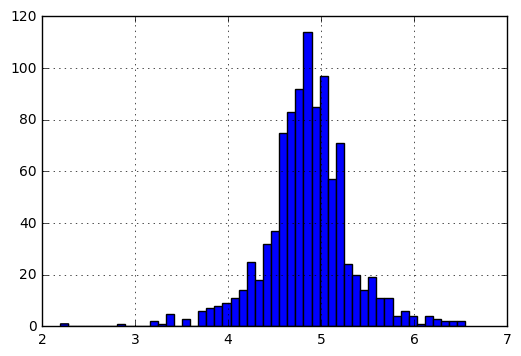

In [15]:
data.head()
data['LoanAmount_log'].hist(bins=50)

In [16]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['Total_Income_Log'] = np.log(data['Total_Income'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 17 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
source               981 non-null object
LoanAmount_log       981 non-null float64
Total_Income         981 non-null float64
Total_Income_Log     981 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 138.0+ KB


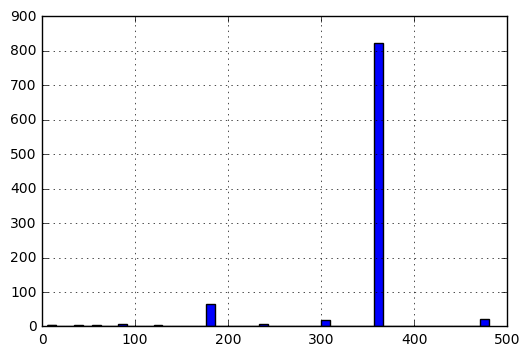

In [18]:
data['Loan_Amount_Term'].hist(bins=50)

In [19]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(),inplace=True)

In [20]:
data['EMI'] = data['LoanAmount']/data['Loan_Amount_Term']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
source               981 non-null object
LoanAmount_log       981 non-null float64
Total_Income         981 non-null float64
Total_Income_Log     981 non-null float64
EMI                  981 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 145.6+ KB


In [22]:
data['Credit_History'].fillna(1.0,inplace=True)
data['Dependents'].fillna('0',inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
source               981 non-null object
LoanAmount_log       981 non-null float64
Total_Income         981 non-null float64
Total_Income_Log     981 non-null float64
EMI                  981 non-null float64
dtypes: float64(8), int64(1), object(9)
memory usage: 145.6+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_to_encode = ['Dependents','Education','Gender','Married','Property_Area','Self_Employed']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])

In [28]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train.drop('source',axis=1,inplace=True)
test.drop(['source','Loan_Status'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null int64
Education            981 non-null int64
Gender               981 non-null int64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null int64
Property_Area        981 non-null int64
Self_Employed        981 non-null int64
source               981 non-null object
LoanAmount_log       981 non-null float64
Total_Income         981 non-null float64
Total_Income_Log     981 non-null float64
EMI                  981 non-null float64
dtypes: float64(8), int64(7), object(3)
memory usage: 145.6+ KB


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 17 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
Credit_History       614 non-null float64
Dependents           614 non-null int64
Education            614 non-null int64
Gender               614 non-null int64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Loan_ID              614 non-null object
Loan_Status          614 non-null object
Married              614 non-null int64
Property_Area        614 non-null int64
Self_Employed        614 non-null int64
LoanAmount_log       614 non-null float64
Total_Income         614 non-null float64
Total_Income_Log     614 non-null float64
EMI                  614 non-null float64
dtypes: float64(8), int64(7), object(2)
memory usage: 86.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 16 columns):
ApplicantIncome      367 non-

(None, None)

In [41]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data1, predictors, outcome):
  #Fit the model:
  model.fit(data1[predictors],data1[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data1[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data1[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data1.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data1[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data1[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data1[predictors].iloc[test,:], data1[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data1[predictors],data1[outcome]) 

## Log Reg

In [47]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)
#model.fit(data1[predictors],data1[outcome])
#train.info()

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [48]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [49]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [51]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','Total_Income_Log']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.341%


In [53]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.277202
Total_Income_Log    0.262328
LoanAmount_log      0.224289
Dependents          0.051033
Property_Area       0.049754
Loan_Amount_Term    0.044540
Married             0.025310
Education           0.023216
Gender              0.021719
Self_Employed       0.020610
dtype: float64


In [66]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Total_Income_Log','LoanAmount_log','Dependents','Property_Area','Loan_Amount_Term','Married','Education','Gender']
#X_test = test.drop('Loan_ID',axis=1)
#classification_model(model, train,predictor_var,outcome_var)
model.fit(train[predictor_var],train[outcome_var])
# logReg.fit(df[predictors],df['Loan_Status'])
dtrain_predictions = model.predict(test[predictor_var])
model.score(train[predictor_var],train['Loan_Status'])

0.71009771986970682

In [64]:
submission = pd.DataFrame({
        'Loan_ID':test['Loan_ID'],
        'Loan_Status':dtrain_predictions
    })
submission.to_csv('Loan_Prediction.csv',index=False)